In [5]:
words = open('../../files/BigramModel/names.txt').read().splitlines()

In [6]:
#print of words, I can see a list
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
'''
Bigram predict the 3rd character based on the last two, then to represent this and create the X and Y dataset, I've copied and understood this python code, if I see for first time,
the most difficult thing to understand was what zip whas doing, and what it does is basically take to iterator (list is a kind of iterator) and put them one fron the other, when one of the
is larger it stops. For example "emma", it iterates over ['e', 'm', 'm', 'a'] and ['m', 'm', 'a'] if I put one front to the other, like a stack I would get something like:

<img src = '/images/portfolio_ai_bigram_zip_example.png'>
'''
for word in words[:1]:
    chs = ['<S>'] + list(word) + ['<E>']
    print(f"{chs=}")
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

chs=['<S>', 'e', 'm', 'm', 'a', '<E>']
<S> e
e m
m m
m a
a <E>


In [8]:
'''Okay, how does this work? As I saw before, it is possible to create a bigram variable with zip. Now, I will save this bigram variable in a dictionary, and each time I find 
this bigram in the dictionary, I'll add 1. For example, the bigram ('a', '<E>') appears 3 times. The first time this bigram passes through the for loop, the dictionary
big_dict[('a', '<E>')] is initialized to 0 + 1. The second time it passes through the for loop, big_dict[('a', '<E>')] is found and incremented by 1 again, and so on.
'''
big_dict = {}
for word in words[:3] :
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        big_dict[bigram] = big_dict.get(bigram, 0) +1

In [9]:
big_dict

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [84]:
'''
To create this matrix, I'll be using PyTorch, a popular library for working with arrays and neural networks.

First, I need to gather all the characters from the text. I'll do this by joining all the text in the `words` variable into one long string using `''.join(words)`. Then, I'll 
use a set to remove duplicates, transform it into a list, and sort it to get a final list of all the characters in the text.

The second step is to create a dictionary to map each character to a number. This is a simple and basic form of a tokenizer. The `enumerate` function will provide us with an iterator 
(list) containing the index and the actual value of the list.

In the third step, we'll use this dictionary to encode the characters in the matrix and count their occurrences. I'll evaluate each word with the first "for" loop and create
a `chs` variable to add special characters. With a second "for" loop, I'll go through pairs of characters in the evaluated word, transforming these two characters into numbers 
using the "string to integer" dictionary. The first character will be the row, and the second will be the column. For example, with "Emma" the first pair evaluated is "Em" 
where "E" is a row and "m" is a column. Each time this combination of characters is found in the loop, the matrix cell at position (x, i) will increase by 1.

'''

import torch
# To create the array that will save the data
N = torch.zeros((28,28), dtype = torch.int32)

#All possible characters in the text
chars = sorted(list(set(''.join(words))))

#String to integer
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s  for s,i in stoi.items()}
#Add special characters at the end

#Create matrix
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xi = stoi[ch1] # row
        xj = stoi[ch2] #column
        N[xi,xj] += 1


In [49]:
N

tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [   0,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050, 7075,    0],
        [   0,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,  114,    0],
        [   0,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,  101,    0],
        [   0, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,  517,    0],
        [   0,  679,

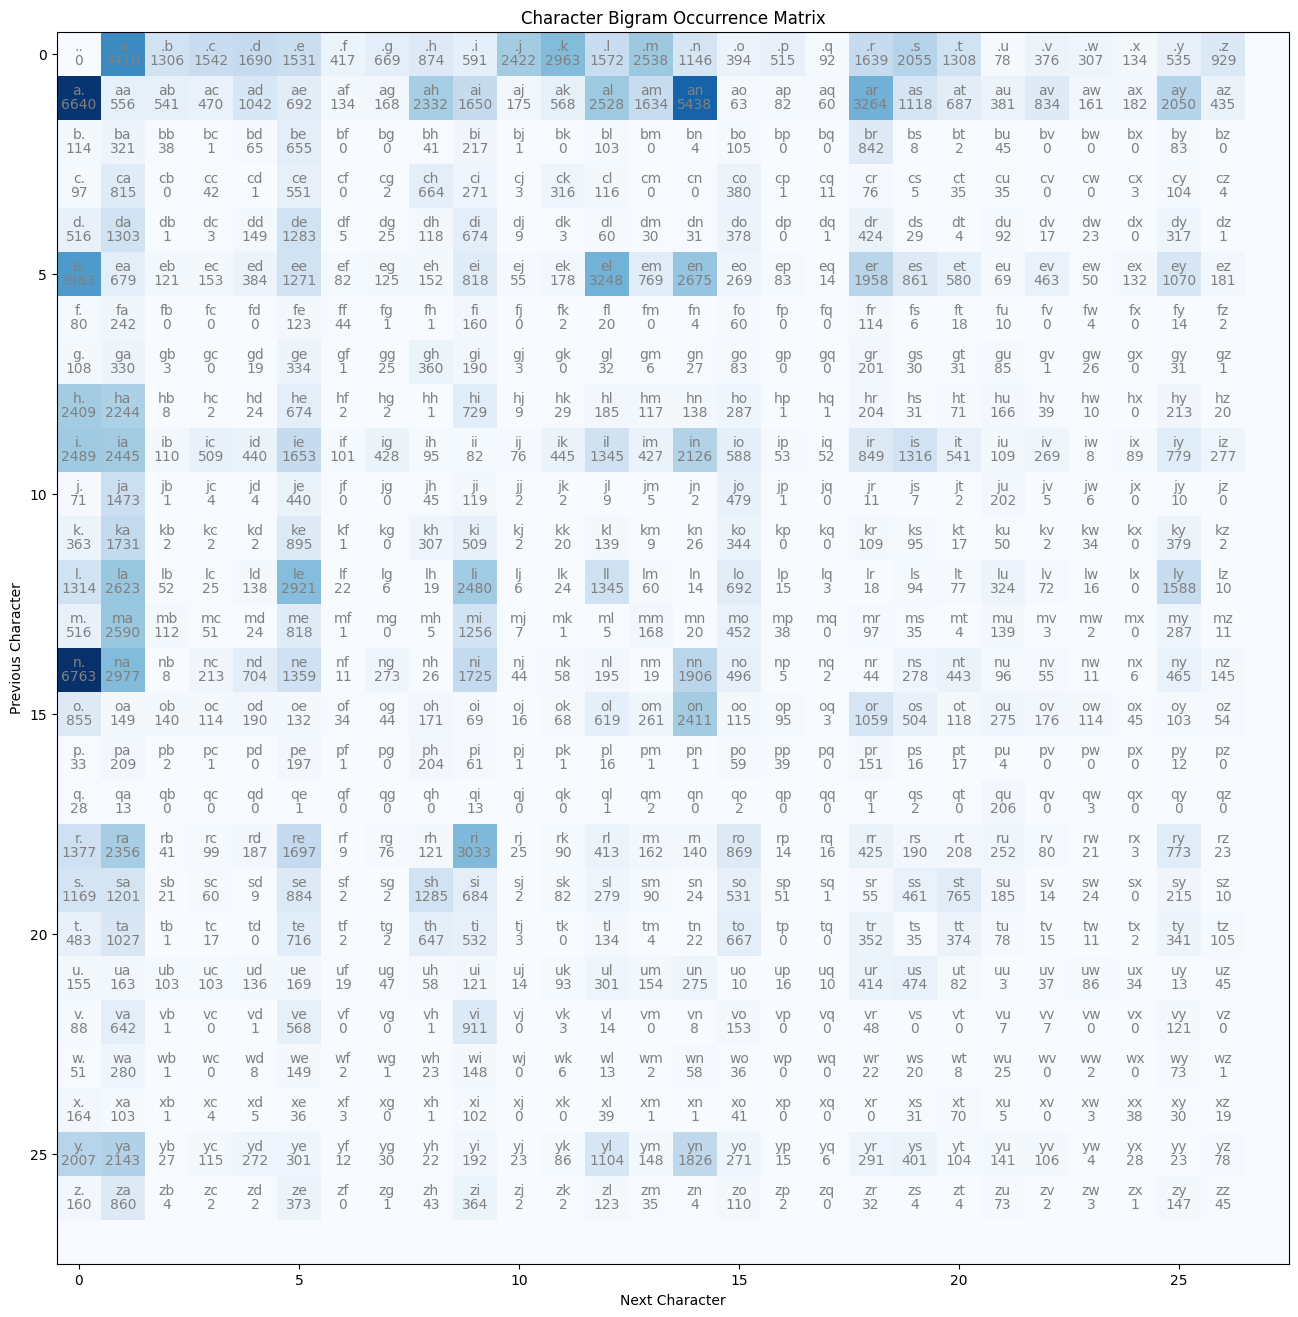

In [75]:
'''
To visualize the matrix, I won't go through much detail, but basically, with matplotlib, I used imshow to create the table, and with a double for loop, I went through this 
visualization and wrote the data that was saved in the count matrix 'N'.

The most important part, it is that now is possible to see what characters are more often together in the list of names.
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j , i , chstr, ha = "center", va = "bottom", color = 'grey')
        plt.text(j , i , N[i,j].item(), ha = "center", va = "top", color = 'grey')
plt.title('Character Bigram Occurrence Matrix')
plt.xlabel('Next Character')
plt.ylabel('Previous Character')
plt.show()

In [86]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [91]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

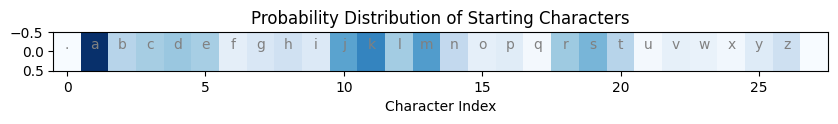

In [116]:
# Set up the figure with a larger size for better visibility
plt.figure(figsize=(10, 0.5))

# Display the probability distribution as an image
plt.imshow(p.unsqueeze(0), aspect='auto', cmap='Blues')

# Annotate each column with the corresponding character
for i in range(27):
    plt.text(i, 0, itos[i], ha="center", va="bottom", color='grey')  # Added missing '0' for y-coordinate

# Add labels and title for clarity
plt.title('Probability Distribution of Starting Characters')
plt.xlabel('Character Index')

# Show the plot
plt.show()

In [126]:
"""
A simple example for torch.multinomial() is the next, I will create a pytorch list with 5 float values representing probabilites for each number, of course it has to sum 1. 
And then what I'll ask to multimodal is to return values between 0 and 4, considering the probabilites of each of them to be sampled.
"""

p = torch.rand(5)
p = p / p.sum()
print(f"The tensor with 5 numbers that sum 1 is: {p}")
samples = torch.multinomial(p, num_samples = 10, replacement= True)
print(f"The samples generated based on the distribution in p is {samples}")

"""
Because the probability of getting the number "1" was 0.3026, higher than the rest, I got more ones sampled.
"""

The tensor with 5 numbers that sum 1 is: tensor([0.0496, 0.3026, 0.2348, 0.1440, 0.2691])
The samples generated based on the distribution in p is tensor([1, 4, 1, 2, 4, 2, 1, 1, 1, 4])


In [130]:
for i in range(10):

    out = []
    ix = 0
    while True:
        P = N[ix].float()
        ix = torch.multinomial(P, replacement = True, num_samples = 1).item()
        out.append(itos[ix])
        if ix == 0:
            break   
    print(''.join(out))

nasainofr.
hrcoeelyvon.
fith.
mebisiack.
rie.
vigeti.
elia.
jadaxtay.
asa.
kana.
